In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = (12, 5)

In [27]:
def read_file(filename, name):
    size = []
    blocks = []
    threads = []
    bandwidth = []
    with open(filename) as file:
        for line in file:
            if line[0:len(name)] == name:
                bois = re.search(r'.*size=\s*(.+?), gDim=\s*(.+?), bDim=\s*(.+?), bw=\s*(.+?)GB/s', line)
                size.append(bois.group(1))
                blocks.append(bois.group(2))
                threads.append(bois.group(3))
                bandwidth.append(bois.group(4))

    data = np.zeros((len(size), 4))
    data[:, 0] = size
    data[:, 1] = blocks
    data[:, 2] = threads
    data[:, 3] = bandwidth

    df = pd.DataFrame(data)
    df.columns = ['size', 'blocks', 'threads', 'bandwidth']

    #df['blocks'] = df['blocks'].astype(int)
    return df

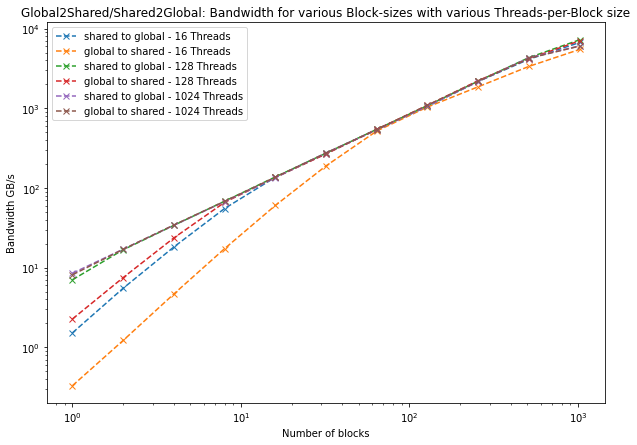

In [28]:
# find best thread number
df_s2g = read_file('4_2_g2s_s2g_fixed.txt', 'Copy shared->global')
df_g2s = read_file('4_2_g2s_s2g_fixed.txt', 'Copy global->shared')

for thread_per_Block in [16, 128, 1024]:
    data_for_block_s2g = df_s2g[df_s2g['threads'] == thread_per_Block]
    data_for_block_g2s = df_g2s[df_g2s['threads'] == thread_per_Block]
    plt.plot(data_for_block_s2g['blocks'], data_for_block_s2g['bandwidth'], marker='x', linestyle='--', label=f'shared to global - {thread_per_Block} Threads')
    plt.plot(data_for_block_g2s['blocks'], data_for_block_g2s['bandwidth'], marker='x', linestyle='--', label=f'global to shared - {thread_per_Block} Threads')

plt.xlabel('Number of blocks')
plt.ylabel('Bandwidth GB/s')
plt.yscale('log')
plt.xscale('log')
plt.title('Global2Shared/Shared2Global: Bandwidth for various Block-sizes with various Threads-per-Block size')
plt.legend()
plt.savefig('g2s_s2g_fixed1.png')

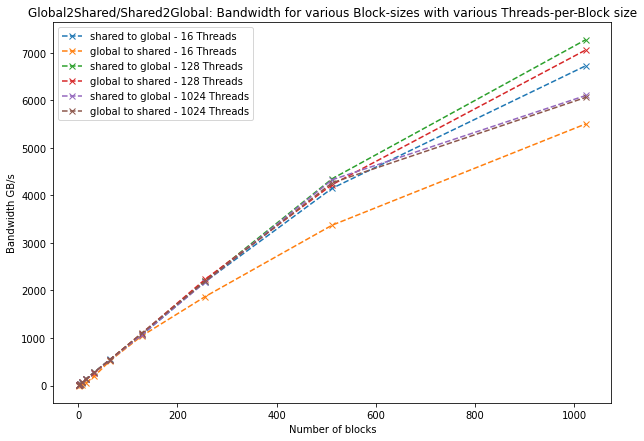

In [29]:
# find best thread number
df_s2g = read_file('4_2_g2s_s2g_fixed.txt', 'Copy shared->global')
df_g2s = read_file('4_2_g2s_s2g_fixed.txt', 'Copy global->shared')

for thread_per_Block in [16, 128, 1024]:
    data_for_block_s2g = df_s2g[df_s2g['threads'] == thread_per_Block]
    data_for_block_g2s = df_g2s[df_g2s['threads'] == thread_per_Block]
    plt.plot(data_for_block_s2g['blocks'], data_for_block_s2g['bandwidth'], marker='x', linestyle='--', label=f'shared to global - {thread_per_Block} Threads')
    plt.plot(data_for_block_g2s['blocks'], data_for_block_g2s['bandwidth'], marker='x', linestyle='--', label=f'global to shared - {thread_per_Block} Threads')

plt.xlabel('Number of blocks')
plt.ylabel('Bandwidth GB/s')
plt.title('Global2Shared/Shared2Global: Bandwidth for various Block-sizes with various Threads-per-Block size')
plt.legend()
plt.savefig('g2s_s2g_fixed2.png')